#Differential Equations

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the 
approximations get better and better. 

In [ ]:
import math
import scipy # Has linear algebra
import scipy.ndimage
import scipy.integrate as spi
import numpy as np
import sympy as sm
from sympy import *
from sympy import series
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline

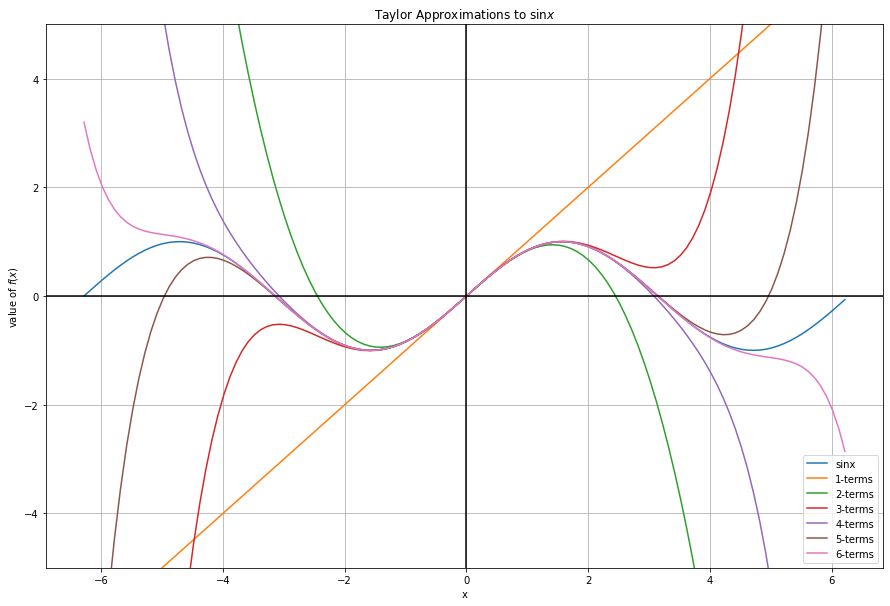

In [ ]:
def taylor_series(x, n):
  """
  To find the Taylor series of a function, f(x)=sinx 
  by computing each terms.
  Input variables: x= angle in radians, n= number of terms for the series
  Returns: sin_app= taylor approximations to sinx 
  """
  sin_app = 0
  for i in range(1, n):
    sign = (-1)**(i-1)
    num = x**(2*i-1)
    den = math.factorial(2*i-1)
    sin_app += (sign)*((num)/(den))
  return sin_app

rad = np.arange(-2*np.pi,2*np.pi,0.1)

#Plotting sinx
sin_plt = np.sin(rad)
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(rad,sin_plt)
legends = ['sinx']

#Plotting Taylor Series
ax.set_ylim([-5,5])
for i in range(2,8):
  taylor_plt = [taylor_series(a,i) for a in rad]
  legends.append(f'{i-1}-terms')
  ax.plot(rad,taylor_plt)
ax.legend(legends)

#Plot parameters
plt.title("Taylor Approximations to sin$x$")
plt.axhline(y=0,  color='k',linestyle='-')
plt.axvline(x=0, color='k', linestyle='-')
plt.xlabel('x')
plt.ylabel('value of $f(x)$')
plt.grid()
plt.show()

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. 

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

###2.a)FINDING THE TAYLOR SERIES

To find the Taylor series of $f(x)= \sqrt{1+x} $ let's find the derivative values as folows: 

$f'(x)= \frac{1}{2} (1+x)^\frac{-1}{2}$

$f''(x)= \frac{-1}{4} (1+x)^\frac{-3}{2}$

$f'''(x)= \frac{3}{8} (1+x)^\frac{-5}{2}$ and so on.

So the Taylor series of a real or complex-valued function $f(x)$ that is infinitely differentiable at a real or complex number $a$ is the power series:

${\displaystyle f(a)+{\frac {f'(a)}{1!}}(x-a)+{\frac {f''(a)}{2!}}(x-a)^{2}+{\frac {f'''(a)}{3!}}(x-a)^{3}+\cdots ,}$  

For simplification, lets assume a to be zero as compared to x, such that the series become,

${\displaystyle f(0)+{\frac {f'(0)}{1!}}x+{\frac {f''(0)}{2!}}x^2+{\frac {f'''(0)}{3!}}x^3+\cdots ,}$  

Now, substituting the derivative values calculated above, the series becomes,

${\displaystyle 1+{\frac {1}{2*1!}}x+{\frac {-1}{4*2!}}x^2+{\frac {3}{8*3!}}x^3+\cdots }$

On simplifying, we get,
${\displaystyle 1+\frac {x}{2}-\frac{x^2}{8}+\frac{x^3}{16}+\cdots }$  

------------------------------------------------------------------------------------------------------------------------
###PROVING THE INEQUALITIES BY SUBSTITUTION

Now, let's break the given inequality into 2 parts:

$1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x}$---(1) 
and

$\sqrt{1+x} \leq 1 + \frac{1}{2}x$---(2)

For (1):  

Let's take the first 3 terms and a residual term for the Taylor series of $\sqrt{1+x}$, ie

${\displaystyle 1+\frac {x}{2}-\frac{x^2}{8}+\frac{x^3}{16}}$ and substitute the value of $x$ to be $-1, 0, 1$ and $2$ and compute the Taylor series and the given polynomial to check the inequalities:

$f(-1)= {\displaystyle 1-\frac {1}{2}-\frac{1}{8}-\frac{1}{16}}=0.3125$ and $P(-1)= {\displaystyle 1-\frac {1}{2}-\frac{1}{8}}=0.375$ so, $P(-1)>f(-1)$ for $x<0$

$f(0)= 1$ and $P(0)= 1$ so, $P(0)=f(0)$ for $x=0$

$f(1)= {\displaystyle 1+\frac {1}{2}-\frac{1}{8}+\frac{1}{16}}=1.4375$ and $P(1)= {\displaystyle 1+\frac {1}{2}-\frac{1}{8}}=1.375$ so, $P(1)<f(1)$ for $x=1$

$f(2)= {\displaystyle 1+\frac {2}{2}-\frac{4}{8}+\frac{8}{16}}=2$ and $P(2)= {\displaystyle 1+\frac {2}{2}-\frac{4}{8}}=1.5$ so, $P(2)<f(2)$ for $x=2$

Thus, we can conclude that for any $x>0$, the inequality $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x}$ holds.

Similarly, for (2):  

Let's take the first 2 terms and a residual term for the Taylor series of $\sqrt{1+x}$, ie,
${\displaystyle 1+\frac {x}{2}-\frac{x^2}{8}}$ and substitute the value of $x$ to be $-1, 0, 1$ and $2$ and compute the Taylor series and the given polynomial to check the inequalities:

$f(-1)= {\displaystyle 1-\frac {1}{2}-\frac{1}{8}}=0.375$ and $P(-1)= {\displaystyle 1-\frac {1}{2}}=0.5$ so, $P(-1)>f(-1)$ for $x<0$

$f(0)= 1$ and $P(0)= 1$ so, $P(0)=f(0)$ for $x=0$

$f(1)= {\displaystyle 1+\frac {1}{2}-\frac{1}{8}}=1.375$ and $P(1)= {\displaystyle 1+\frac {1}{2}}=1.5$ so, $P(1)>f(1)$ for $x=1$

$f(2)= {\displaystyle 1+\frac {2}{2}-\frac{4}{8}}=1.5$ and $P(2)= {\displaystyle 1+\frac {2}{2}}=2$ so, $P(2)>f(2)$ for $x=2$

Thus, we can conclude that for any $x>0$, the inequality
$\sqrt{1+x} \leq 1 + \frac{1}{2}x$ holds.

We can view the proof by plotting the three expressions as $x$ increases.


In [ ]:
x = symbols("x")
exp = sm.sqrt(1+x)
print("LHS Expression:")
display(series(exp,n=3))
print("RHS Expression: ")
display(series(exp,n=2))

LHS Expression:


         2        
    x   x     ⎛ 3⎞
1 + ─ - ── + O⎝x ⎠
    2   8         

RHS Expression: 


    x    ⎛ 2⎞
1 + ─ + O⎝x ⎠
    2        

###PROVING THE INEQUALITIES BY THEOREMS
Again lets assume:

$1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x}$---(1) 
and

$\sqrt{1+x} \leq 1 + \frac{1}{2}x$---(2)

For (1), let's take the first 3 terms and a residual term from above for the Taylor series of $\sqrt{1+x}$, then we have to prove,
$1 + \frac{x}{2} - \frac{x^2}{8} \leq \sqrt{1+x}  = \displaystyle 1 + \frac{x}{2} - \frac{x^{2}}{8} + O\left(x^{3}\right)$

Now, for any value of $ x > 0 $, if $O(x^{3})\geq 0 $ then inequality (1) holds.

Calculating the Remainder as, 
$\left|R_n\right| \leq f^{n+1}(c)  \frac{ x^{n+1}}{(n+1)!}$where $f^{n+1}$ is $(n+1)^{th}$ derivative of $f(x)$

For $ 0 < c < x $, 

$\left|R_3\right| = \left|O(x^3)\right| \leq\left|f^{4}(c)  \frac{ x^{4}}{(4)!}\right|$
$=\left| \frac{-15}{16(1+c)^{\frac{7}{2}}} \frac{ x^{4}}{(4)!}\right|$
$=\left|\frac{-15 x^{4}}{16(1+c)^{\frac{7}{2}}*24} \right|$
$=\left|\frac{-15 x^{4}}{384(1+c)^{\frac{7}{2}}} \right|$
$=\left|\frac{-5 x^{4}}{128(1+c)^{\frac{7}{2}}} \right|$

For $0<c<x$, $R_3$ will be minimum at $c=x$ and maximum at $c=0$. Hence, 

$=)\frac{5 x^4}{128(1+x)^{\frac{7}{2}}} \leq |R_3| \leq \frac{5 x^4}{128}$

So its clear that for any $x>0$, $R_3$=$O(x^{3})\geq 0 $ as $x$ has even power and the inequality (1) holds true.  

-------------------------------------------------------------------------------------------------------------------------------
For (2), let's apply Mean Value Theorem for the interval $(0,x)$ on $f(x) = \sqrt{1+x}$,so,

$=)\frac{f(x) - f(0)}{x-0} = f'(a) = \frac{1}{2\sqrt{1+a}}$

$f'(a)$ is maximum when denominator is minimum. 

Then for, a = 0,

$=)\frac{f(x) - f(0)}{x-0} \leq \frac{1}{2}$

$=)\frac{\sqrt{1+x} - 1}{x} \leq \frac{1}{2}$

$=)\sqrt{1+x} -1 \leq \frac{x}{2}$

$=)\sqrt{1+x} \leq 1 + \frac{x}{2}$

This proves the inequality (2)



In [ ]:
#2.b)
x = symbols('x')
#To convert into functions
Func_exp = lambdify(x, exp, modules = ['numpy'])
LHS_exp = lambdify(x, 1 + x/2 -(x**2)/8, modules = ['numpy'])
RHS_exp = lambdify(x,1 + x/2, modules = ['numpy'])

#For sqrt(2)
x = 1  #As exp is sqrt(1+x) so,for 2, x = 1 
print('sqrt(2):')
print('As per RHS exp:',LHS_exp(x))
print('As per function:',Func_exp(x))
print('As per RHS exp:',RHS_exp(x))
if RHS_exp(x)>=Func_exp(x)>=LHS_exp(x):
  print('Inequality holds')
else:
  print('Inequality does not hold')

#For sqrt(3)
x = 2  #As exp is sqrt(1+x) so,for 2, x = 1 
print('sqrt(3):')
print('As per LHS exp:',LHS_exp(x))
print('As per function:',Func_exp(x))
print('As per RHS exp:',RHS_exp(x))
if RHS_exp(x)>=Func_exp(x)>=LHS_exp(x):
  print('Inequality holds')
else:
  print('Inequality does not hold')

sqrt(2):
As per RHS exp: 1.375
As per function: 1.4142135623730951
As per RHS exp: 1.5
Inequality holds
sqrt(3):
As per LHS exp: 1.5
As per function: 1.7320508075688772
As per RHS exp: 2.0
Inequality holds


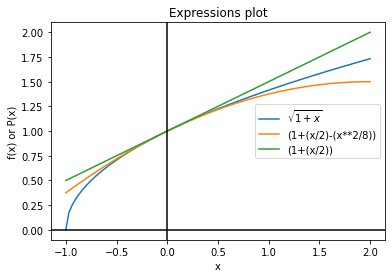

In [ ]:
#2.c)
#Plot for proving the inequalities in P2
x = np.linspace(-1,2,100);

plt.plot(x, np.sqrt(1+x), label="$\sqrt{1+x}$") #------------Given function
plt.plot(x, (1+(x/2)-(x**2/8)), label="(1+(x/2)-(x**2/8))") #1st polynomial
plt.plot(x, (1+(x/2)), label="(1+(x/2))") #------------------2nd polynomial    

plt.xlabel("x")
plt.ylabel("f(x) or P(x)")
plt.title("Expressions plot")
plt.axhline(y=0,  color='k')
plt.axvline(x=0, color='k')
plt.legend();

### 3. Equilibria Points and Linearization

For each of the
following systems:
(i) find the equilibria, 
(ii) linearize the system around each equilibrium and find the eigenvalues, and
(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

(i) To find equilibria: $\dot x_1=0$ and $\dot x_2=0$, ie, $x_2^2=0, x_2=0$ and $x_1^2=0, x_1=0$

(ii) To linearize the system, we represent it as $\dot x= Ax$ and calculate the Jacobian as, 
$$ J = \begin{pmatrix}
\frac{\delta x_2^2}{\delta x_1} && \frac{\delta x_2^2}{\delta x_2}\\
\frac{\delta x_1^2}{\delta x_1} && \frac{\delta x_1^2}{\delta x_2}\\
\end{pmatrix} = 
\begin{pmatrix}
0 && 2x_2 \\
2x_1 && 0
\end{pmatrix}
$$
By substituting, $x_2=0, x_1=0$ we have, 
$$A=\begin{pmatrix}
0 && 0 \\
0 && 0
\end{pmatrix}
$$
iii) Lets find the eigenvalues as:

In [ ]:
A = sm.Matrix([
               [0 , 0],
               [0 , 0]])
A.eigenvals()

{0: 2}

As both eigenvalues are 0. The system is unstable at equilibrium (0,0).

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

(i) To find equilibria: $\dot x_1=0$ and $\dot x_2=0$, ie, $x_1^2+x_2^2=0$ and $x_2=0$ then, $x_1=0$ ie $(0,0)$.

(ii) To linearize the system, we represent it as $\dot x= Ax$ and calculate the Jacobian as, 
$$ J = \begin{pmatrix}
\frac{\delta (x_1^2+x_2^2)}{\delta x_1} && \frac{\delta (x_1^2+x_2^2)}{\delta x_2}\\
\frac{\delta x_2}{\delta x_1} && \frac{\delta x_2}{\delta x_2}\\
\end{pmatrix} = 
\begin{pmatrix}
2x_1 && 2x_2 \\
0 && 1
\end{pmatrix}
$$
By substituting, $x_2=0, x_1=0$ we have, 
$$A=\begin{pmatrix}
0 && 0 \\
0 && 1
\end{pmatrix}
$$
iii) Lets find the eigenvalues as:

In [ ]:
A = sm.Matrix([
               [0 , 0],
               [0 , 1]])
A.eigenvals()

{0: 1, 1: 1}

iii) The eigenvalues are 0 and 1. One is zero and other one positive real, thus the system is unstable at equilibrium (0,0).

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

(i) To find equilibria: $\dot x_1=0$ and $\dot x_2=0$, 

ie, $sin x_2=0, x_2=0, \pm\pi,\pm2\pi...= n\pi,$ and $cos x_1=0, x_1=\pm \frac{\pi}{2}, \pm \frac{3\pi}{2},\pm \frac{5\pi}{2}...=(2n+1)\frac{\pi}{2}$. 

Thus the equillibrium is at points: $((2n+1)\frac{\pi}{2}, n\pi)$ for $n \in \mathbb{Z}$.

(ii) To linearize the system, we represent it as $\dot x= Ax$ and calculate the Jacobian as, 
$$ J = \begin{pmatrix}
\frac{\delta sin x_2}{\delta x_1} && \frac{\delta sin x_2}{\delta x_2}\\
\frac{\delta cos x_1}{\delta x_1} && \frac{\delta cos x_1}{\delta x_2}\\
\end{pmatrix} = 
\begin{pmatrix}
0 && cos x_2 \\
-sin x_1 && 0
\end{pmatrix}
$$
By substituting, $x_1=\frac{(2n+1)\pi}{2}$ and $x_2=n\pi$ we have, 

For even values of n:
$$A1=\begin{pmatrix}
0 && 1 \\
-1 && 0
\end{pmatrix}
$$
For odd values of n:
$$A2=\begin{pmatrix}
0 && -1 \\
1 && 0
\end{pmatrix}
$$
Lets find the eigenvalues as:

In [ ]:
A1 = sm.Matrix([
               [0 , 1],
               [-1 , 0]])
A2 = sm.Matrix([
               [0 , 1],
               [-1 , 0]])
A1.eigenvals(), A2.eigenvals()

({-ⅈ: 1, ⅈ: 1}, {-ⅈ: 1, ⅈ: 1})

Both the eigenvalues are -i and i which are imaginary. The system is oscillatory and unstable at equilibrium $((2n+1)\frac{\pi}{2}, n\pi)$.

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. 
For what values of $k$ is the system stable? 

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

      _________    
    ╲╱ 1 - 4⋅k    1
k - ─────────── - ─
         2        2

      _________    
    ╲╱ 1 - 4⋅k    1
k + ─────────── - ─
         2        2

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


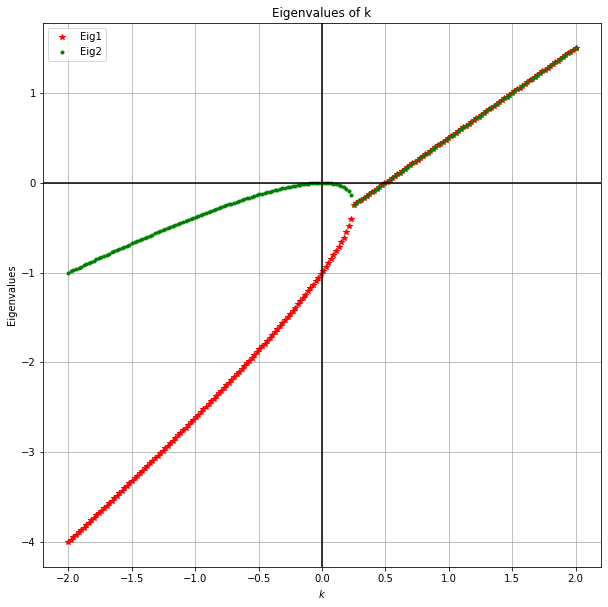

In [ ]:
#4.a)
k = sm.symbols('k')
eig1_lst, eig2_lst = [], [] #Initializing 2 lists to store eigenvalues

#Defining the given matrix
A = sm.Matrix([
               [k , -k],
               [1 , k-1]])
eig_1, eig_2 = A.eigenvals()
display(eig_1, eig_2)

#Turning eigenvalues into functions for plotting
eig_1 = lambdify(k, eig_1)
eig_2 = lambdify(k, eig_2)

x = np.linspace(-2, 2, 200)
fig = plt.figure(figsize = (10,10))

#Creating eigenvalues list and plotting
for i in range(len(x)):
  eig1_lst.append(eig_1(complex(x[i].real)))
  eig2_lst.append(eig_2(complex(x[i].real)))
  plt.plot(x[i], eig1_lst[i], '*', color = 'r') 
  plt.plot(x[i], eig2_lst[i], '.', color = 'g') 
plt.plot(x[i], eig1_lst[i],'*', color = 'r', label='Eig1')
plt.plot(x[i], eig2_lst[i],'.', color = 'g', label='Eig2')

#Plot parameters
plt.title("Eigenvalues of k")
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('$k$')
plt.ylabel('Eigenvalues')
plt.legend();
plt.grid()
plt.show()

####$k$ is stable for all its negative eigenvalues, that is when $k\leq0$

Text(0.5, 1.0, 'For $k=1$')

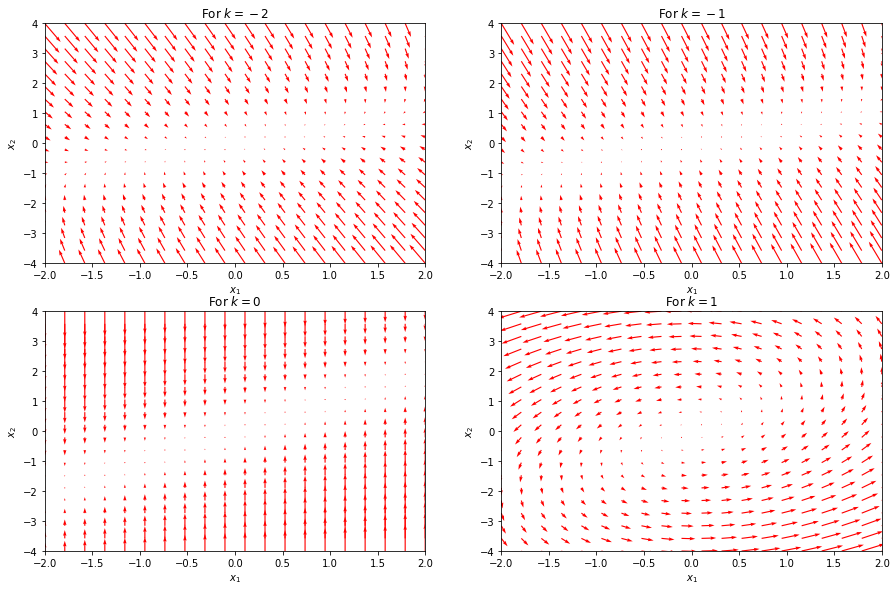

In [ ]:
#4.b)
def f_vdp(x, k): 
    return [
            k*x[0]-k*x[1],
            x[0]+(k-1)*x[1]
            ]

#To make a grid
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)

fig = plt.figure(figsize = (15,15))

#Plotting k in the stable range
#When eigenvalues are negative

#For k = -2
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = -2
for i in range(n):
    for j in range(m):
        xdot = f_vdp([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(321)
Q = plt.quiver(X1, X2, u, v, color='r')

#Plot parameters
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("For $k=-2$")

#For k = -1
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = -1
for i in range(n):
    for j in range(m):
        xdot = f_vdp([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(322)
Q = plt.quiver(X1, X2, u, v, color='r')

#Plot parameters
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("For $k=-1$")

#For k=0
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = 0
for i in range(n):
    for j in range(m):
        xdot = f_vdp([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(323)
Q = plt.quiver(X1, X2, u, v, color='r')

#Plot parameters
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("For $k=0$")

#Plotting k in the unstable range
#When eigenvalues are positive

#For k=1
u,v = np.zeros(X1.shape), np.zeros(X2.shape)
n,m = X1.shape
k = 1
for i in range(n):
    for j in range(m):
        xdot = f_vdp([X1[i,j],X2[i,j]], k )
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
fig.add_subplot(324)
Q = plt.quiver(X1, X2, u, v, color='r')

#Plot parameters
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("For $k=1$")

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points. 

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

In [ ]:
#5.a)
w1 , w2, w3= sm.symbols("w1, w2, w3") #Defining symbols for matrix
#Defining the given matrix
A = sm.Matrix([
               [0, -w3, w2],
               [w3, 0, -w1],
               [-w2, w1, 0]
               ])
B = A.T #Calculating the transpose
display("Tranpose matrix of A:", B)
display("Negative of matrix A:", -A)
if B==-A:
  print("A is skew symmetric")
else:
  print("A is not skew symmetric")

'Tranpose matrix of A:'

⎡ 0   w₃   -w₂⎤
⎢             ⎥
⎢-w₃   0   w₁ ⎥
⎢             ⎥
⎣w₂   -w₁   0 ⎦

'Negative of matrix A:'

⎡ 0   w₃   -w₂⎤
⎢             ⎥
⎢-w₃   0   w₁ ⎥
⎢             ⎥
⎣w₂   -w₁   0 ⎦

A is skew symmetric


In [ ]:
#5.b)
a = sm.symbols('a') 
x = a*sm.Matrix([
                [w1],
                [w2],
                [w3]
                ])
x_dot = A*x
display("A*x=","x_dot=", x_dot)
print("x_dot is zero only if x is equilibrium point")

'A*x='

'x_dot='

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦

x_dot is zero only if x is equilibrium point


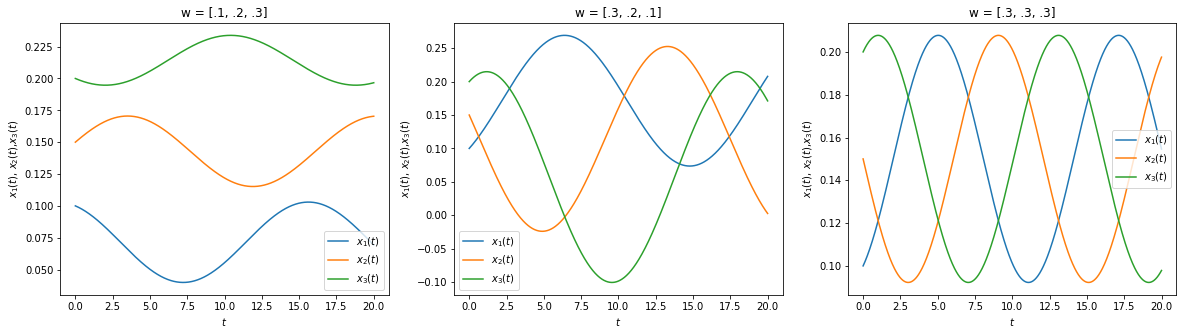

In [ ]:
#5.c)
#Defining the given matrix
A = sm.Matrix([
               [0, -w3, w2],
               [w3, 0, -w1],
               [-w2, w1, 0]
               ])

#1)For w= [.1, .2, .3]
def f_vdp_1(x,t): 
    w = [.1,.2,.3]
    return [
            0 -w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] +0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1]+0
            ]

#Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_1 = spi.odeint(f_vdp_1,[0.1,0.15,0.2],t)

fig = plt.figure(figsize=(20,5))
#Plot three components of x
fig.add_subplot(131)
plt.plot(t, trajectory_1[0:,0],label="$x_1(t)$")
plt.plot(t, trajectory_1[0:,1],label="$x_2(t)$")
plt.plot(t, trajectory_1[0:,2],label="$x_3(t)$")
plt.xlabel('$t$')
plt.ylabel('$x_1(t)$, $x_2(t)$,$x_3(t)$')
plt.title("w = [.1, .2, .3]")
plt.legend();

#2)For w =[.3, .2, .1]
def f_vdp_2(x,t): 
    w = [.3,.2,.1]
    return [
            0 - w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] + 0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1] +0
            ]

#Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_2 = spi.odeint(f_vdp_2,[0.1,0.15,0.2],t)

#Plot three components of x
fig.add_subplot(132)
plt.plot(t, trajectory_2[0:,0],label="$x_1(t)$")
plt.plot(t, trajectory_2[0:,1],label="$x_2(t)$")
plt.plot(t, trajectory_2[0:,2],label="$x_3(t)$")
plt.xlabel('$t$')
plt.ylabel('$x_1(t)$, $x_2(t)$,$x_3(t)$')
plt.legend();
plt.title("w = [.3, .2, .1]")

#3)For w= [.3, .3, .3]
def f_vdp_3(x,t): 
    w = [.3,.3,.3]
    return [
            0 -w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] +0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1]+0
            ]

#Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_3 = spi.odeint(f_vdp_3,[0.1,0.15,0.2],t)

#Plot three components of x
fig.add_subplot(133)
plt.plot(t, trajectory_3[0:,0],label="$x_1(t)$")
plt.plot(t, trajectory_3[0:,1],label="$x_2(t)$")
plt.plot(t, trajectory_3[0:,2],label="$x_3(t)$")
plt.xlabel('$t$')
plt.ylabel('$x_1(t)$, $x_2(t)$,$x_3(t)$')
plt.title("w = [.3, .3, .3]")
plt.legend();

Text(0.5, 1.0, 'w = [0.1,0.2,0.3]')

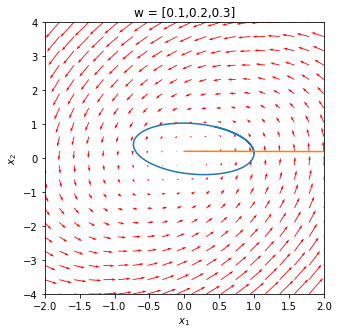

In [ ]:
#1)For w = [.1,.2,.3]
#Plotting in x1-x2 plane 

def f_vdp_4(x,t): 
    w = [.1,.2,.3]
    return [
            0 - w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] + 0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1] + 0
            ]

#To make a grid
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape
for i in range(n):
    for j in range(m):
        xdot = f_vdp_4([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]

plt.rcParams['figure.figsize'] = [5,5]
# Plot vector field
Q = plt.quiver(X1, X2, u, v, color='r',scale=2, angles='xy', scale_units='xy')

# Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_4 = spi.odeint(f_vdp_4,[1,0.15,0.2],t);

# Plot the trajectory
plt.plot(trajectory_4[0:,0], trajectory_4[0:,1],trajectory_4[0:,2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("w = [0.1,0.2,0.3]")

Text(0.5, 1.0, 'w = [0.3,0.2,0.1]')

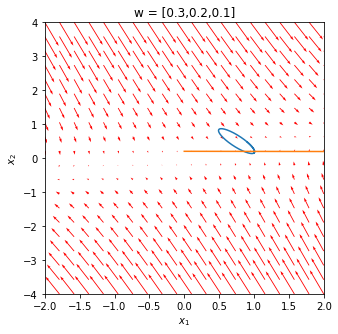

In [ ]:
#2)For w = [.3,.2,.1]
#Plotting in x1-x2 plane 

def f_vdp_5(x,t): 
    w = [.3,.2,.1]
    return [
            0 - w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] + 0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1] + 0
            ]

#To make a grid
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape
for i in range(n):
    for j in range(m):
        xdot = f_vdp_5([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
        
plt.rcParams['figure.figsize'] = [5,5]
# Plot vector field
Q = plt.quiver(X1, X2, u, v, color='r',scale=2, angles='xy', scale_units='xy')

# Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_5 = spi.odeint(f_vdp_5,[1,0.15,0.2],t);

# Plot the trajectory
plt.plot(trajectory_5[0:,0], trajectory_5[0:,1],trajectory_5[0:,2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("w = [0.3,0.2,0.1]")

Text(0.5, 1.0, 'w = [0.3,0.3,0.3]')

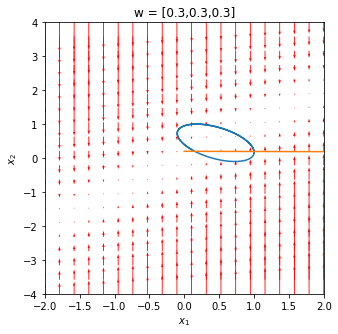

In [ ]:
#3)For w = [.3,.3,.3]
#Plotting in x1-x2 plane 

def f_vdp_6(x,t): 
    w = [.3,.3,.3]
    return [
            0 - w[2]*x[1] + w[1]*x[2],
            w[2]*x[0] + 0 - w[0]*x[2],
            -w[1]*x[0] + w[0]*x[1] + 0
            ]

#To make a grid
a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape
for i in range(n):
    for j in range(m):
        xdot = f_vdp_6([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]
        v[i,j] = xdot[1]
        
plt.rcParams['figure.figsize'] = [5,5]
# Plot vector field
Q = plt.quiver(X1, X2, u, v, color='r',scale=2, angles='xy', scale_units='xy')

# Find the trajectory
t = np.linspace(0., 20., 1001)
trajectory_6 = spi.odeint(f_vdp_6,[1,0.15,0.2],t);

# Plot the trajectory
plt.plot(trajectory_6[0:,0], trajectory_6[0:,1],trajectory_6[0:,2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.title("w = [0.3,0.3,0.3]")

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. 

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

Text(0, 0.5, '$x_2$')

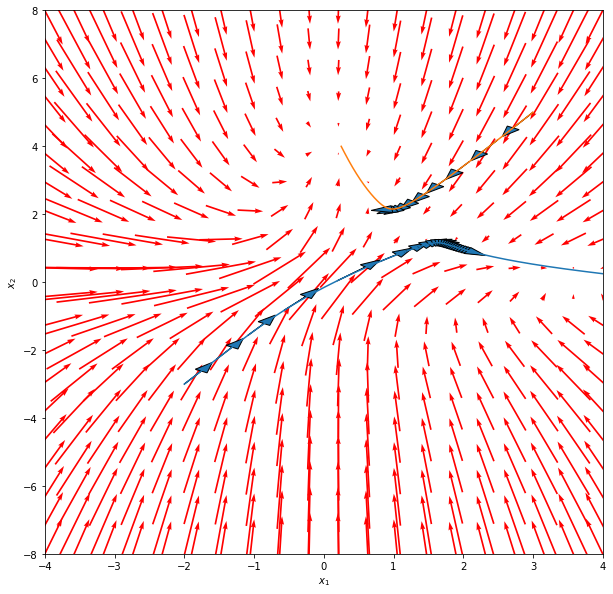

In [ ]:
A1 = A2 = 17/4 #Given value

def f_vdp_7(x,t):
    return [
          A1/(1 + (x[1])**2) - x[0] ,
          A2/(1 + (x[0])**2) - x[1] 
          ]

#To plot the grid
a1,b1 = (-4,4)
a2,b2 = (-8,8)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)    
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = f_vdp_7([X1[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]                  
        v[i,j] = xdot[1]                  

fig = plt.figure(figsize=(10,10))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=5, scale_units='xy', pivot='mid')

#To find the 1st trajectory
t = np.linspace(0., 20, 1001)
trajectory_7 = spi.odeint(f_vdp_7,[-2,-3],t);

for i in range(25):
    x = trajectory_7[10*i]
    y = 0.1*np.array(f_vdp_7(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)

#Plotting the 1st trajectory starting from (-2,-3)    
plt.plot(trajectory_7[0:,0], trajectory_7[0:,1])       

#To find the 2nd trajectory
t = np.linspace(0., 20, 1001)
trajectory_7 = spi.odeint(f_vdp_7,[3,5],t);

for i in range(10):
    x = trajectory_7[10*i]
    y = 0.1*np.array(f_vdp_7(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)

#Plotting the 2nd trajectory starting from (3,5)        
plt.plot(trajectory_7[0:,0], trajectory_7[0:,1])

#Plotting parameters 
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

####The plot clearly shows that there are 2 isolated equilibra corresponding to having one protein be high and the other low and are unstable. 

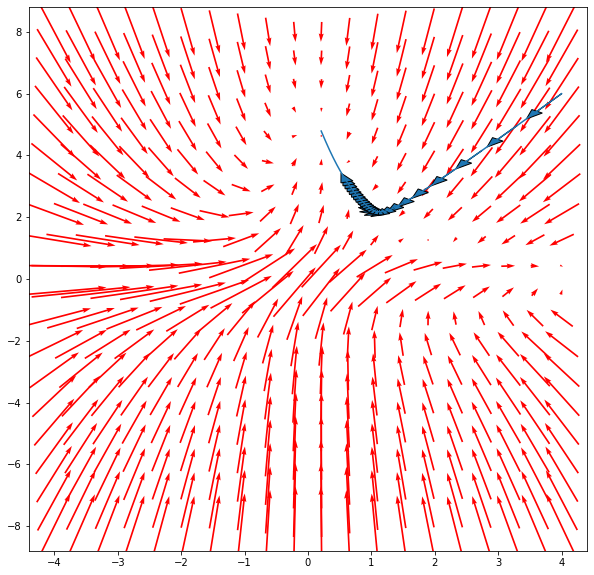

In [ ]:
A1 = A2 = 5  #Self assumed values

def f_vdp_7(x,t):
    return [
          A1/(1 + (x[1])**2) - x[0] ,
          A2/(1 + (x[0])**2) - x[1] 
          ]

#To plot the grid
a1,b1 = (-4,4)
a2,b2 = (-8,8)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)    
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = f_vdp_7([X1[i,j],X2[i,j]],0)
        u[i,j] = xdot[0]                   
        v[i,j] = xdot[1]                   

fig = plt.figure(figsize=(10,10))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=5, scale_units='xy', pivot='mid')

#To find the trajectory
t = np.linspace(0., 20, 1001)
trajectory_7 = spi.odeint(f_vdp_7,[4,6],t)

for i in range(25):
    x = trajectory_7[10*i]
    y = 0.1*np.array(f_vdp_7(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.2)

#Plotting the 1st trajectory starting from (4,6)     
plt.plot(trajectory_7[0:,0], trajectory_7[0:,1])

### 7. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 

Text(0.5, 1.0, 'Vector plot and Trajectory')

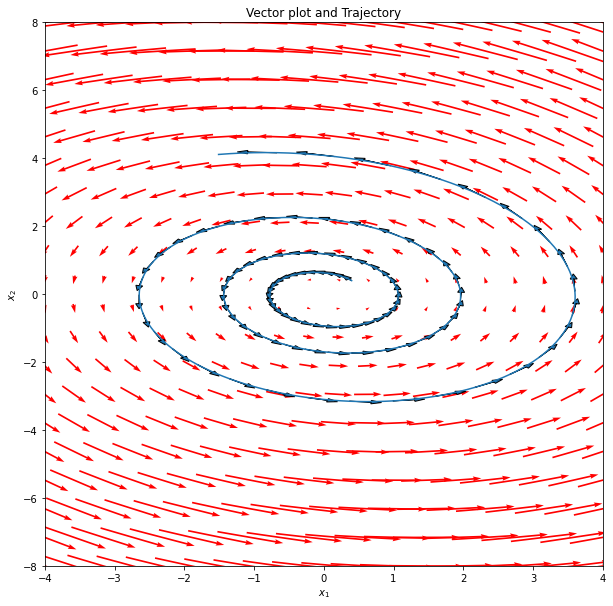

In [ ]:
a = 0.2
b = 0.2
c = 5.7

def f_vdp_8(x,t):
    return[
          -x[1] - x[2],
          x[0] + a*x[1],
          b + x[2]*(x[0] - c)
          ]

#To make grid
a1,b1 = (-4,4)
a2,b2 = (-8,8)
x1 = np.linspace(a1, b1, 20)
x2 = np.linspace(a2, b2, 20)
X1,X2 = np.meshgrid(x1,x2)    
u,v = np.zeros(X1.shape), np.zeros(X2.shape) 
n,m = X1.shape

for i in range(n):
    for j in range(m):
        xdot = f_vdp_8([X1[i,j],X2[i,j],X2[i,j]],0)
        u[i,j] = xdot[0] 
        v[i,j] = xdot[1] 

#Plotting 
fig = plt.figure(figsize = (10,10))
Q = plt.quiver(X1, X2, u, v, color='r' ,scale=15, scale_units='xy',pivot='mid')

#Finding the trajectory
trajectory_8 = spi.odeint(f_vdp_8,[0.4,0.4,0],t);

for i in range(100):
    x = trajectory_8[10*i]
    y = 0.1*np.array(f_vdp_8(x,0))
    plt.arrow(x[0], x[1], y[0], y[1],head_width=0.1)
    
#Plotting parameters
plt.plot(trajectory_8[0:,0], trajectory_8[0:,1]);
plt.xlim([a1,b1])
plt.ylim([a2,b2])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title("Vector plot and Trajectory")

####From the plot of the trajectory, we can comment that the system is oscillating outwards and is unstable. 